# Sentiment Analysis of Product Reviews

### Introduction:
The scope of this project was to analyze Amazon Alexa product data to gain insights from reviews provided by customers. The analysis was done using Python.

* **Data Source:** Amazon Alexa Reviews dataset on [Kaggle](https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews/#).


The first goal was to analyze the data to discover what was the most frequent rating, what was the overall customer sentiment,
and which product variations had the most reviews and the least reviews.

The second goal was to use Natural Language Processing to analyze the sentiment of the reviews,
to discover what the customers liked from the products, and to learn about what the customers
may have wanted improvements on. Analyzing customer sentiment is important,
because it allows a company to build upon business strategies and improve the experience of 
their customers.

### Importing the Libraries:

In [1]:
# To import the libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import nltk
import string
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
pd.options.display.float_format = '{:,.4f}'.format
pd.set_option('display.max_columns', None)

### Loading the Data:

In [2]:
# To load the data and to save it to a data frame:
reviews_df = pd.read_csv('amazon_alexa.tsv',sep='\t')

### Viewing the Data:

In [3]:
# To view the first rows of the data frame:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


* The **rating** column indicates the number of stars that the customer gave the product.<br><br>
* The **date** column indicates the date of the product review.<br><br>
* The **variation** column indicates the product variation.<br><br>
* The **verified_reviews** column indicates the product review provided by the customer.<br><br>
* The **feedback** column indicates the sentiment label that has already beenassigned to each review. In this column, 0 represents a negative sentiment and 1 represents a positive sentiment.This column can be used as the target variable if a binary classification machine learningmodel will be used to predict if a review is negative or positive.

### Viewing the Structure of the Data:

In [4]:
# To view the structure of the data frame:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


The data frame contains 3,150 rows and 5 columns.

### Viewing Summary Statistics:

In [5]:
# To view summary statistics:
reviews_df.describe()

,rating,feedback
count,"3,150.0000","3,150.0000"
mean,4.4632,0.9184
std,1.0685,0.2738
min,1.0000,0.0000
25%,4.0000,1.0000
50%,5.0000,1.0000
75%,5.0000,1.0000
max,5.0000,1.0000


The minimum rating is 1 star and the maximum rating is 5 stars.

### Inspecting for Duplicate Rows:

In [6]:
# To examine the data frame for any duplicate rows:
reviews_df.duplicated().sum()

715

There were 715 duplicate rows in the data frame.

In [7]:
# To display some of the duplicate rows:
reviews_df[reviews_df.duplicated()]

,rating,date,variation,verified_reviews,feedback
700,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
701,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
702,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
703,5,30-Jul-18,Heather Gray Fabric,looks great,1
704,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [8]:
# Row 700 was a duplicate row. To find a row that was
# identical to row 700:
identical_row = reviews_df[reviews_df.eq(reviews_df.iloc[700]).all(1)]
# Print the identical row
display(identical_row)

,rating,date,variation,verified_reviews,feedback
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
700,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1


Row 700 was a duplicate of row 5.<br><br>

Duplicate rows can cause problems in analysis and modeling, because they can alter results and make it difficult to draw accurate conclusions.  For these reasons, the duplicate rows were removed.

In [9]:
# To remove the duplicate rows from the data frame:
reviews_df = reviews_df.drop_duplicates().reset_index(drop=True)
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
2430,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
2431,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
2432,4,29-Jul-18,Black Dot,Good,1
2433,5,29-Jul-18,Black Dot,Nice little unit no issues,1


The data frame originally had 3,150 rows. After removing the 715 duplicate rows, the data frame now
consisted of 2,435 rows.

### Inspecting for Missing Values:

In [10]:
# To inspect the data frame for missing values:
reviews_df.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

There were no missing values in the data frame.

## Exploratory Data Analysis:

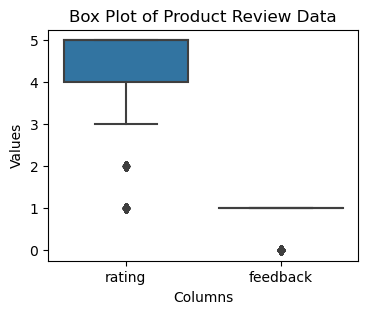

In [11]:
# To inspect the columns for outliers:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
sns.boxplot(reviews_df)
plt.title('Box Plot of Product Review Data')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.gca().yaxis.set_major_formatter('{x:,.0f}')
plt.show()

Most of the products received a rating of 4 stars or 5 stars, while a rating of 1 star or 2 stars was considered an outlier.<br><br> 

In [12]:
# To analyze the distribution of the rating column:
rating_count = reviews_df['rating'].value_counts().sort_index()
rating_count

1     141
2      80
3     113
4     345
5    1756
Name: rating, dtype: int64

The **most frequent rating** for the product reviews was 5 stars. This suggests that the overall customer sentiment was positive.<br><br>

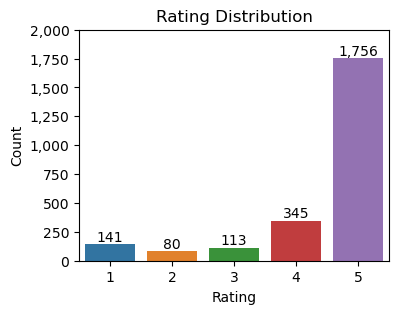

In [13]:
# To visualize the distribution of the rating column:
import matplotlib.ticker as mtick
plt.figure(figsize=(4, 3))
ax = sns.countplot(data=reviews_df, x='rating', width=0.8)
# Add labels to the bars with zero decimal places
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), 
                (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
# Format y-axis with comma separator
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.set_ylim([0, 2000])
plt.show()

The bar chart shows that there was a high customer satisfaction level.
Most of the product reviews gave a rating of 5 stars.<br><br> 

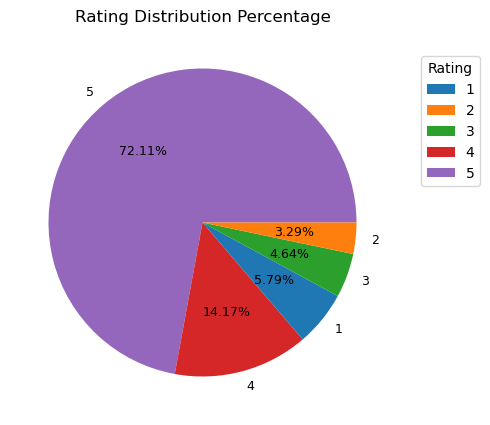

In [14]:
# To visualize the distribution percentage of the rating column:
import matplotlib.pyplot as plt
import seaborn as sns
data = reviews_df['rating'].value_counts()
colors = {1: 'tab:blue', 2: 'tab:orange', 3: 'tab:green', 4: 'tab:red', 5: 'tab:purple'}
colors = [colors[i] for i in data.index]
plt.figure(figsize=(5, 5))
sns.set_palette(colors)
plt.pie(data, labels=data.index, autopct='%.2f%%', textprops={'fontsize': 9})
plt.title('Rating Distribution Percentage')
handles, labels = plt.gca().get_legend_handles_labels()
order = sorted(range(len(labels)), key=lambda k: data.index[k])
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], 
           title='Rating', loc='upper left', bbox_to_anchor=(1.05, 0.95))
plt.show()

More than half of the reviews had 5 star ratings.<br><br>

In [15]:
# To analyze the distribution of the feedback column:
feedback_count = reviews_df['feedback'].value_counts()
feedback_count

1    2214
0     221
Name: feedback, dtype: int64

**The overall customer sentiment** was positive.
* **90.92%** of the reviews were labeled as positive ((2214 / 2435) x 100 = 90.92%).<br>

* **9.08%** of the reviews were labeled as negative ((221 / 2435) x 100 = 9.08%).<br><br>

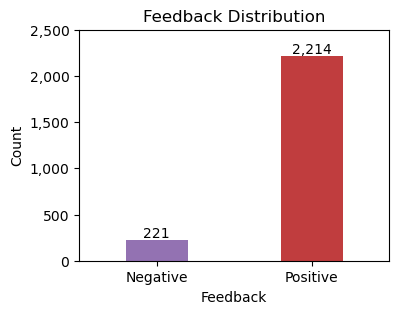

In [16]:
# To visualize the distribution of the feedback column:
import matplotlib.ticker as mtick
plt.figure(figsize=(4, 3))
ax = sns.countplot(data=reviews_df, x='feedback', width=0.4)
# Add labels to the bars with zero decimal places
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), 
                (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.title('Feedback Distribution')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
# Format y-axis with comma separator
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.set_ylim([0, 2500])
plt.show()

The bar chart shows that the overall sentiment of the reviews was positive.<br><br>

In [17]:
# To analyze the distribution of the variation column:
variation_count = reviews_df['variation'].value_counts()
variation_count

Configuration: Fire TV Stick    342
Black  Plus                     270
Black                           261
Black  Show                     260
Black  Dot                      252
Black  Spot                     241
Charcoal Fabric                 219
White  Spot                     108
White  Dot                       92
White                            91
White  Show                      85
Heather Gray Fabric              79
White  Plus                      78
Sandstone Fabric                 45
Oak Finish                        7
Walnut Finish                     5
Name: variation, dtype: int64

The **product variation that had the most reviews** was Configuration: Fire TV Stick and
**the product variation that had the least reviews** was Walnut Finish.<br><br>

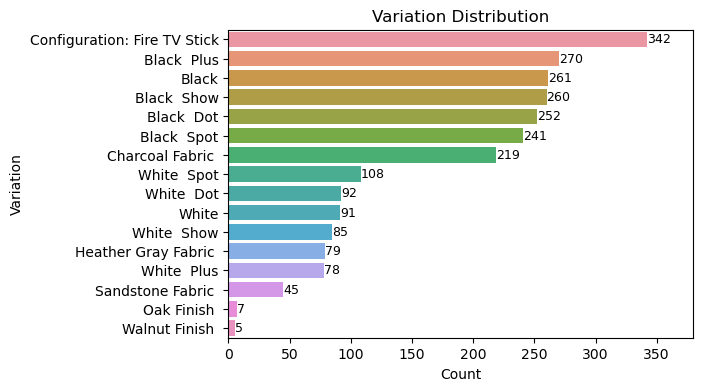

In [18]:
# To visualize the distribution of the variation column:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=reviews_df, y='variation', order=reviews_df['variation'].value_counts().index)
# Add labels to the bars using the enumerate function
for i, p in enumerate(ax.patches):
    ax.annotate(format(p.get_width(), ',.0f'), (p.get_width(), i), ha='left', va='center',
               fontsize=9)
plt.title('Variation Distribution')
plt.ylabel('Variation')
plt.xlabel('Count')
# Format x-axis with comma separator and zero decimal places
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.set_xlim([0, 380])
plt.show()

There was a significant difference in the number of reviews between the most frequently reviewed
product variation and the least frequently reviewed product variation.<br><br>

## Natural Language Processing:

Upon inspecting the
reviews, some of the text included punctuation marks and some text included emojis. The text of the reviews was first preprocessed to remove any punctuation marks, to make the text lowercase,
to remove emojis, and to remove stop words. Stop words are common words that 
do not contribute to the sentiment of the review.

In [19]:
# To first preprocess the text in the verified_reviews column: 
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Make the text lowercase
    text = text.lower()

    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('ascii')
    
    # Remove stop words
    # To add 'alexa', 'Alexa', 'amazon', 'Amazon', 'echo', and 'device' to the stop words list 
    # and to remove the word 'not' from the stop words list
    stop_words = set(stopwords.words('english')) | {'alexa', 'Alexa', 'amazon', 'Amazon', 'echo',
                                                    'device'}
    stop_words -= {'not'}
    word_tokens = nltk.word_tokenize(text)
    filtered_text = [word for word in word_tokens if not word in stop_words]
    
    return ' '.join(filtered_text)
# Apply the preprocessing function to each review in the data frame
reviews_df['verified_reviews'] = reviews_df['verified_reviews'].apply(preprocess_text)
display(reviews_df)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love,1
1,5,31-Jul-18,Charcoal Fabric,loved,1
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1
3,5,31-Jul-18,Charcoal Fabric,lot fun thing 4 yr old learns dinosaurs contro...,1
4,5,31-Jul-18,Charcoal Fabric,music,1
...,...,...,...,...,...
2430,5,30-Jul-18,Black Dot,love things running entire home tv lights ther...,1
2431,5,30-Jul-18,White Dot,complaint sound quality isnt great mostly use ...,1
2432,4,29-Jul-18,Black Dot,good,1
2433,5,29-Jul-18,Black Dot,nice little unit issues,1


The punctuation marks were removed, the text was converted to lowercase, the emojis were removed,
and the stop words 
were removed. The word "not" was removed from the list of stop words so that it
would not be deleted from the review. Deleting "not" from a review could affect the sentiment analysis of the
review. The words "alexa", "Alexa", "amazon", "Amazon", "echo", and "device" were added to the list of stop words, because
these words may appear many times in the reviews and the goal was to focus on words describing the opinions and sentiment
towards different aspects of the products.<br><br>

When analyzing the ratings, 4 stars or 5 stars can be interpreted as being a positive review 
of the product.  A rating of 1 star or 2 stars can be interpreted as being a negative review 
of the product. The data frame was first filtered to analyze the positive reviews.

In [20]:
# To filter the data frame for ratings of 4 stars or 5 stars:
four_or_five_stars = reviews_df[(reviews_df['rating'] == 4) | (reviews_df['rating'] == 5)]
four_or_five_stars

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love,1
1,5,31-Jul-18,Charcoal Fabric,loved,1
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1
3,5,31-Jul-18,Charcoal Fabric,lot fun thing 4 yr old learns dinosaurs contro...,1
4,5,31-Jul-18,Charcoal Fabric,music,1
...,...,...,...,...,...
2430,5,30-Jul-18,Black Dot,love things running entire home tv lights ther...,1
2431,5,30-Jul-18,White Dot,complaint sound quality isnt great mostly use ...,1
2432,4,29-Jul-18,Black Dot,good,1
2433,5,29-Jul-18,Black Dot,nice little unit issues,1


A word cloud was created for the reviews that had a rating of 4 stars or 5 stars to gain insights into what words were frequently used in positive reviews.

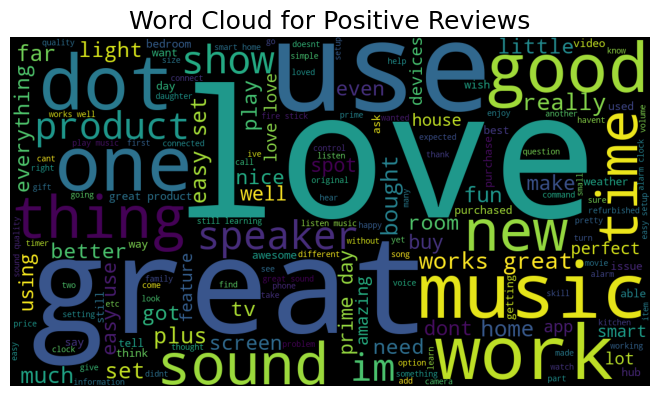

In [21]:
# To create a word cloud to visualize frequently used words in positive reviews:
text = ' '.join(four_or_five_stars['verified_reviews'])
# Create a word cloud object
wordcloud = WordCloud(width=1100, height=600, 
                      background_color='black', 
                      min_font_size=12,
                      random_state=100).generate(text)
# Display the generated image
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Word Cloud for Positive Reviews',size=18)
plt.show()

Some words that frequently appeared in positive reviews were love, use, and great.<br><br>

Positive reviews that contained the word "love" were examined:

In [22]:
# To examine two positive reviews that contained the word "love":
pd.options.display.max_colwidth = 400

four_or_five_stars[four_or_five_stars['verified_reviews'] \
                   .str.contains('love')]['verified_reviews'][61:63]

215    love great sound easy connect use
224               love great sound smart
Name: verified_reviews, dtype: object

<br><br>Positive reviews that contained the word "use" were examined:

In [23]:
# To examine two positive reviews that contained the word "use":
pd.options.display.max_colwidth = 400

four_or_five_stars[four_or_five_stars['verified_reviews'] \
                   .str.contains('use')]['verified_reviews'][51:53]

294                           use product enjoyment love
295    easy use great soundit great purchase great price
Name: verified_reviews, dtype: object

<br><br>Positive reviews that contained the word "great" were examined:

In [24]:
# To examine two positive reviews that contained the word "great":
pd.options.display.max_colwidth = 400

four_or_five_stars[four_or_five_stars['verified_reviews'] \
                   .str.contains('great')]['verified_reviews'][49:51]

227                 works absolutely great
228    amazing product great sound quality
Name: verified_reviews, dtype: object

<br>
**Insights from Positive Reviews:**
* Love the sound.
* Easy to use.
* Great sound quality.<br><br>

The data frame was then filtered to analyze the negative reviews.

In [25]:
# To filter the data frame for ratings of 1 star or 2 stars:
one_or_two_stars = reviews_df[(reviews_df['rating'] == 1) | (reviews_df['rating'] == 2)]
one_or_two_stars

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,like siri fact siri answers accurately dont see real need household though good bargain prime day deals,0
111,2,30-Jul-18,Charcoal Fabric,sound terrible u want good music get bose,0
141,1,30-Jul-18,Charcoal Fabric,not much features,0
162,1,30-Jul-18,Sandstone Fabric,stopped working 2 weeks didnt follow commands really fun working,0
176,2,30-Jul-18,Heather Gray Fabric,sad joke worthless,0
...,...,...,...,...,...
2336,1,30-Jul-18,Black Dot,dot responds us arent even talking ive unplugged feels like 34spying34 us,0
2337,1,30-Jul-18,White Dot,not connected phone playlist,0
2356,2,30-Jul-18,Black Dot,negative product terrible sound quality massive difference us big reason wanted purchase thiswont buying another speaker sound quality improve,0
2378,1,30-Jul-18,Black Dot,didnt order,0


A word cloud was created for the reviews that had a rating of 1 star or 2 stars to gain insights into what words were frequently used in negative reviews.

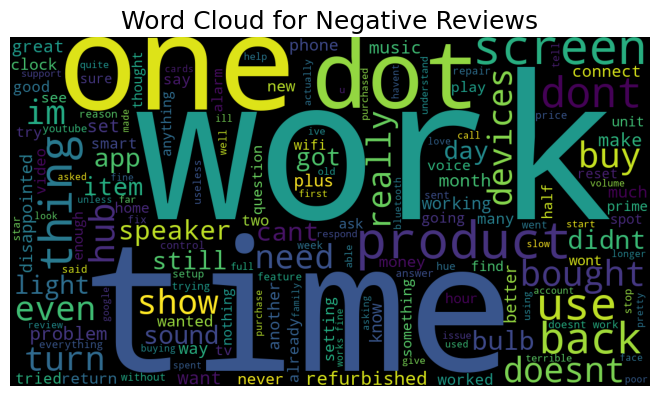

In [26]:
# To create a word cloud to visualize frequently used words in negative reviews:
text = ' '.join(one_or_two_stars['verified_reviews'])
# Create a word cloud object
wordcloud = WordCloud(width=1100, height=600, 
                      background_color='black', 
                      min_font_size=12,
                      random_state=100).generate(text)
# Display the generated image
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Word Cloud for Negative Reviews',size=18)
plt.show()

Some words that frequently appeared in negative reviews were work, time, and disappointed.<br><br>

Negative reviews that contained the word "work" were examined:

In [27]:
# To examine two negative reviews that contained the word "work":
pd.options.display.max_colwidth = 400

one_or_two_stars[one_or_two_stars['verified_reviews'] \
                   .str.contains('work')]['verified_reviews'][5:7]

373                                                                    im fan one not work
381    worked month stopped ive tried everything try make work nothing working want refund
Name: verified_reviews, dtype: object

<br><br>Negative reviews that contained the word "time" were examined:

In [28]:
# To examine two negative reviews that contained the word "time":
pd.options.display.max_colwidth = 400

one_or_two_stars[one_or_two_stars['verified_reviews'] \
                 .str.contains('time')]['verified_reviews'].iloc[[31, 40]]

1841                       still doesnt work bet call let know charge 3rd time ridiculous
2299    sound terrible not pair play simultaneously must upgrade music want play one time
Name: verified_reviews, dtype: object

<br><br>Negative reviews that contained the word "disappointed" were examined:

In [29]:
# To examine two negative reviews that contained the word "disappointed":
pd.options.display.max_colwidth = 400

one_or_two_stars[one_or_two_stars['verified_reviews'] \
                 .str.contains('disappointed')]['verified_reviews'].iloc[[4, 8]]

1140                                                     disappointed doesnt hear doesnt respond requests
1580    awesome rcieved light buld not know u need another adapter light buld work not aware disappointed
Name: verified_reviews, dtype: object

<br>
**Insights from Negative Reviews:**
* Did not continue to work.
* Not working after charging more than one time.
* Product did not hear requests.<br><br>

The sentiment of each review was then analyzed.

In [30]:
# To analyze the sentiment of each review:

# Create an instance of the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply the sentiment analyzer to each review in the data frame and 
# create a new column for compound scores
reviews_df['sentiment'] = reviews_df['verified_reviews'] \
.apply(lambda x: sia.polarity_scores(x)['compound'])

In [31]:
# To display the first 50 rows of the data frame:
reviews_df.head(50)

,rating,date,variation,verified_reviews,feedback,sentiment
0,5,31-Jul-18,Charcoal Fabric,love,1,0.6369
1,5,31-Jul-18,Charcoal Fabric,loved,1,0.5994
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correctly says got wrong answers like able turn lights away home,1,0.0516
3,5,31-Jul-18,Charcoal Fabric,lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well,1,0.9169
4,5,31-Jul-18,Charcoal Fabric,music,1,0.0000
5,5,31-Jul-18,Heather Gray Fabric,received gift needed another bluetooth something play music easily accessible found smart speaker cant wait see else,1,0.8555
6,3,31-Jul-18,Sandstone Fabric,without cellphone not use many features ipad not see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep herit fun ask random questions hear response not seem smartbon politics yet,1,-0.5851
7,5,31-Jul-18,Charcoal Fabric,think 5th one ive purchased im working getting one every room house really like features offer specifily playing music echos controlling lights throughout house,1,0.5563
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,0.6249
9,5,30-Jul-18,Heather Gray Fabric,love ive listened songs havent heard since childhood get news weather information great,1,0.8519


The values in the sentiment column range from -1 (most negative) to 1 (most positive) and represent the overall sentiment of each product review.
A value of 0 indicates a neutral sentiment.

In [32]:
# To view summary statistics for the sentiment column:
reviews_df['sentiment'].describe().to_frame()

,sentiment
count,"2,435.0000"
mean,0.5175
std,0.3842
min,-0.9839
25%,0.3612
50%,0.6369
75%,0.8114
max,0.9946


The lowest sentiment value was -0.9839 and the highest sentiment value was 0.9946. The mean and the
median values of the sentiment column were greater than 0.50, indicating that the overall sentiment of the reviews was
positive.

## Findings:
* The most frequent rating for the product reviews was 5 stars.<br><br>
* The overall customer sentiment was positive, 90.92% of the reviews were labeled aspositive and 9.08% of the reviews were labeled as negative.<br><br>
* The product variation that had the most reviews was Configuration: Fire TV Stick and theproduct variation that had the least reviews was Walnut Finish.<br><br>
* Customers commented that they liked the sound quality, but some reviews mentioned that theproduct did not continue to work.<br><br>
* The sentiment analysis indicated that the reviews were mainly positive about the products.<br><br>
<br><br>
<br><br>